In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
Profiles  = pd.read_table('RC_edit_electron_Profile_6_1_17.csv', sep= ",", index_col=0, header=[0,1,2], skiprows=[3]).fillna(0).astype(float);
Profiles.head()  # loaded data, comse in as multi-index, not sure why different

Energy:         6 MeV                                                     \
Fieldsize: 60 x 60 mm 60 x 100 mm 100 x 100 mm 150 x 150 mm 200 x 200 mm   
Depth:        13.0 mm     13.0 mm      13.0 mm      13.0 mm      13.0 mm   
-158              0.0         0.0          0.0          0.0          0.0   
-157              0.0         0.0          0.0          0.0          0.0   
-156              0.0         0.0          0.0          0.0          0.0   
-155              0.0         0.0          0.0          0.0          0.0   
-154              0.0         0.0          0.0          0.0          0.0   

Energy:                      9 MeV                                        \
Fieldsize: 250 x 250 mm 60 x 60 mm 60 x 100 mm 100 x 100 mm 150 x 150 mm   
Depth:          13.0 mm    21.0 mm     21.0 mm      21.0 mm      21.0 mm   
-158                0.0        0.0         0.0          0.0          0.0   
-157                0.0        0.0         0.0          0.0          0.0   
-156                0.5        0.0         0.0          0.0          0.0   
-155                0.5        0.0         0.0          0.0          0.0   
-154                0.5        0.0         0.0          0.0          0.0   

Energy:        ...            12 MeV                               16 MeV  \
Fieldsize:     ...      150 x 150 mm 200 x 200 mm 250 x 250 mm 60 x 60 mm   
Depth:         ...           29.0 mm      29.0 mm      29.0 mm    30.0 mm   
-158           ...               0.0          0.0          1.4        0.0   
-157           ...               0.0          0.0          1.6        0.0   
-156           ...               0.0          0.0          1.7        0.0   
-155           ...               0.0          0.0          1.9        0.0   
-154           ...               0.0          0.0          2.1        0.0   

Energy:                                                                     \
Fieldsize: 60 x 100 mm 100 x 100 mm 150 x 150 mm 200 x 200 mm 250 x 250 mm   
Depth:         30.0 mm      30.0 mm      30.0 mm      30.0 mm      30.0 mm   
-158               0.0          0.0          0.0          0.0          1.7   
-157               0.0          0.0          0.0          0.0          1.8   
-156               0.0          0.0          0.0          0.0          1.9   
-155               0.0          0.0          0.0          0.0          2.0   
-154               0.0          0.0          0.0          0.0          2.1   

Energy:          20 MeV  
Fieldsize: 100 x 100 mm  
Depth:          24.0 mm  
-158                0.0  
-157                0.0  
-156                0.0  
-155                0.0  
-154                0.0  

[5 rows x 25 columns]

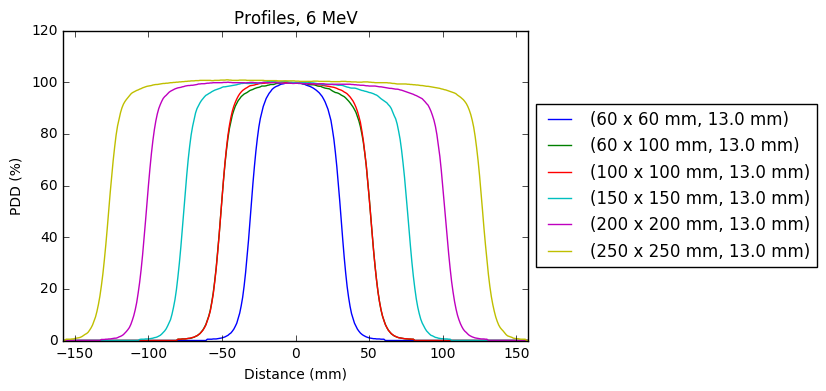

In [3]:
Profiles['6 MeV'].plot()
plt.title('Profiles, 6 MeV')
plt.ylabel('PDD (%)')
plt.xlabel('Distance (mm)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [4]:
PDD  = pd.read_table('RC_edit_electron_PDD_6_1_17.csv', sep= ",", index_col=0, header=[0,1,2], skiprows=[3]).fillna(0).astype(float);
#PDD.set_option('display.multi_sparse', True)
PDD.head()  # loaded data, comse in as multi-index, not sure why different

Energy:         6 MeV                                                     \
Fieldsize: 60 x 60 mm 60 x 100 mm 100 x 100 mm 150 x 150 mm 200 x 200 mm   
Depth:        39.4 mm     40.0 mm      39.4 mm      39.4 mm      40.0 mm   
-2               74.9        74.1         75.4         75.7         76.3   
-1               74.7        74.0         75.3         75.5         76.2   
 0               74.9        74.1         75.4         75.7         76.2   
 1               75.4        74.8         76.1         76.7         77.0   
 2               77.7        77.3         78.5         79.0         79.6   

Energy:                      9 MeV                                        \
Fieldsize: 250 x 250 mm 60 x 60 mm 60 x 100 mm 100 x 100 mm 150 x 150 mm   
Depth:          40.0 mm    54.4 mm     55.0 mm      54.4 mm      54.4 mm   
-2                 77.0       79.6        78.7         79.9         79.8   
-1                 77.0       79.4        78.6         79.7         79.8   
 0                 77.3       79.5        78.5         79.9         79.9   
 1                 77.9       79.7        79.0         80.3         80.6   
 2                 80.3       81.5        81.1         82.0         82.3   

Energy:        ...            12 MeV                               16 MeV  \
Fieldsize:     ...      150 x 150 mm 200 x 200 mm 250 x 250 mm 60 x 60 mm   
Depth:         ...           74.4 mm      75.0 mm      75.0 mm    94.4 mm   
-2             ...              85.4         86.3         86.4       91.0   
-1             ...              85.2         86.2         86.3       90.6   
 0             ...              85.3         86.1         86.2       90.4   
 1             ...              85.7         86.7         86.8       90.3   
 2             ...              87.4         88.5         88.4       92.3   

Energy:                                                                     \
Fieldsize: 60 x 100 mm 100 x 100 mm 150 x 150 mm 200 x 200 mm 250 x 250 mm   
Depth:         95.0 mm      94.4 mm      94.4 mm      95.0 mm      95.0 mm   
-2                90.1         90.5         89.7         89.6         89.8   
-1                89.8         90.3         89.5         89.6         89.6   
 0                89.7         90.3         89.6         89.5         89.5   
 1                90.3         90.3         90.0         90.2         90.2   
 2                92.1         92.1         91.8         91.9         91.9   

Energy:          20 MeV  
Fieldsize: 100 x 100 mm  
Depth:         120.0 mm  
-2                 91.3  
-1                 91.1  
 0                 91.1  
 1                 91.8  
 2                 93.5  

[5 rows x 25 columns]

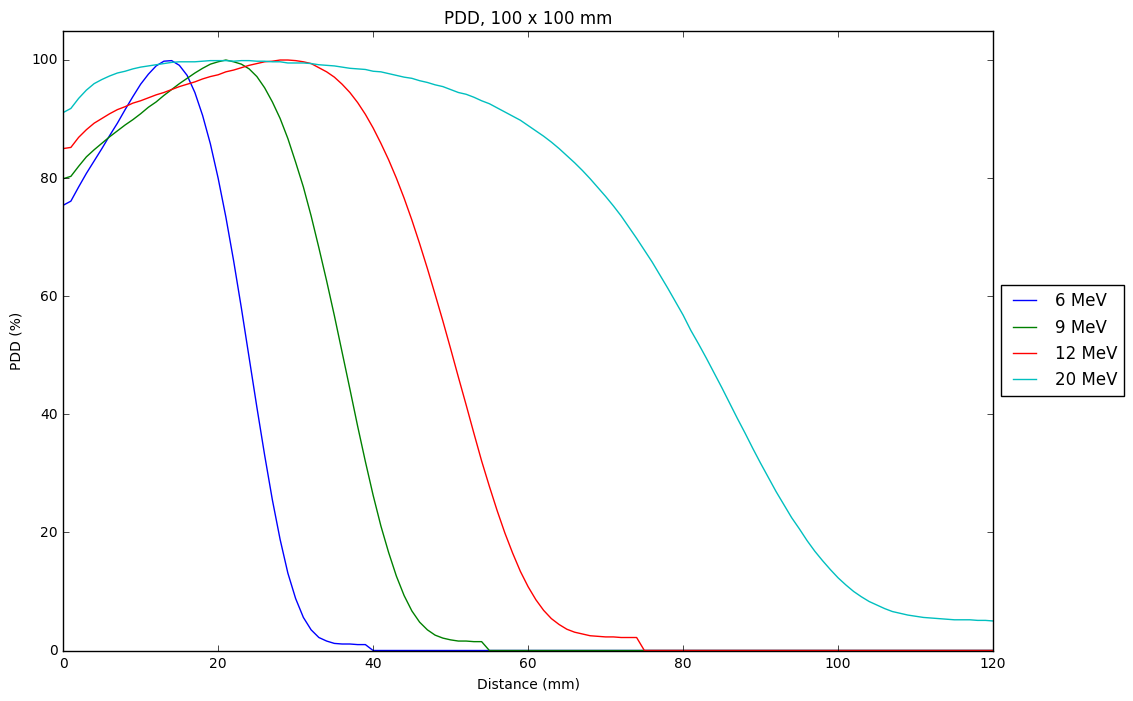

In [5]:
fig = plt.figure(figsize=(12, 8))
plt.plot(PDD['6 MeV']['100 x 100 mm'], label='6 MeV')
plt.plot(PDD['9 MeV']['100 x 100 mm'], label = '9 MeV')
plt.plot(PDD['12 MeV']['100 x 100 mm'], label = '12 MeV')
plt.plot(PDD['20 MeV']['100 x 100 mm'], label = '20 MeV')

plt.title('PDD, 100 x 100 mm')

plt.xlim(0,120)
plt.ylim(0,105)
plt.ylabel('PDD (%)')
plt.xlabel('Distance (mm)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## Interpolate PDD and calculate R50d etc

In [6]:
PDD_6MV = PDD['6 MeV']['100 x 100 mm']
x = PDD_6MV.index.get_values()    # to get list of values rather than index object
y = PDD_6MV.values.flatten()      # to get array
f = interpolate.interp1d(x,y)   # returns an interpolate function

In [7]:
xnew = np.arange(0, 100)   # x scale is depth in mm, 0 - 100
ynew = f(xnew)   # use interpolation function returned by `interp1d`

In [8]:
PDD_6MV_interp = pd.Series(data=ynew, index=xnew)

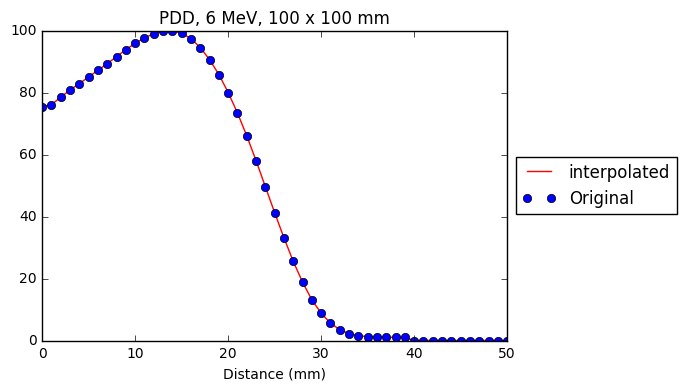

In [9]:
plt.plot(PDD_6MV_interp, color='red',label='interpolated', linestyle='-')
plt.plot(PDD_6MV, label='Original', marker='o', linestyle='')
plt.xlim(0,50)
plt.title('PDD, 6 MeV, 100 x 100 mm')
plt.xlabel('Distance (mm)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Create interpolation to get depth at PDD value

In [10]:
g = interpolate.interp1d(y, x)
six_MeV_R50d = g(50.0)
six_MeV_Z_ref = 0.6*six_MeV_R50d - 1  

print('R50d is {0} mm with Z_ref of {1} mm '.format(six_MeV_R50d, six_MeV_Z_ref))   # 

R50d is 23.952380952380953 mm with Z_ref of 13.371428571428572 mm 


# Stopping powers

Extracted from http://www-pub.iaea.org/MTCD/publications/PDF/TRS398_scr.pdf page 66.

R50d = beam quality

Relative_depth = relative depth in water z/R50d

In [11]:
SPR  = pd.read_table('Stopping-power-ratios-IAEA.csv', sep= ",", index_col=0).fillna(0).astype(float);
SPR.columns.name = 'R50d'
#SPR   # plot of IAEA values

In [12]:
#SPR['20'].plot()

In [13]:
# Calculate SPR using analytic expression

def calc_SPR(R50d, z):   # here z is actual depth, not relative as in the table
    x = np.log(R50d)
    y = z/R50d    # this is the relative depth, in the table above
    a = 1.075
    b = -0.5087
    c = 0.0887
    d = -0.084
    e = -0.4281
    f = 0.0646
    g = 0.00309
    h = -0.125
    numerator = a + b*x + c*x**2 + d*y
    denominator = 1 + e*x + f*x**2 + g*x**3 + h*y
    SPR = numerator/denominator
    return SPR

print('The relative depth is {} '.format(calc_SPR(R50d = 1, z= 1)))    
print('This agrees with the IAEA value, all good')

The relative depth is 1.1325714285714286 
This agrees with the IAEA value, all good


Calc the SPR with depth for the 6 MeV

In [14]:
PDD_6MV_SPR = pd.Series(data=calc_SPR(six_MeV_R50d, xnew), index=xnew)

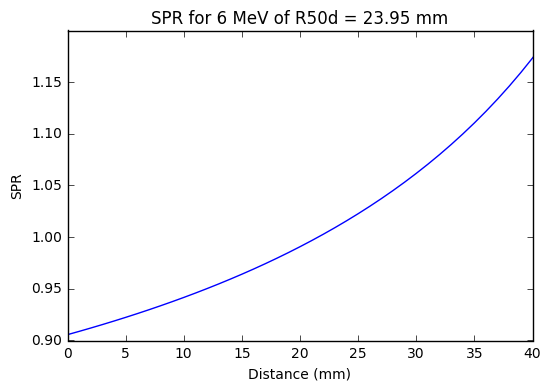

In [15]:
plt.plot(PDD_6MV_SPR)
plt.title('SPR for 6 MeV of R50d = 23.95 mm')
plt.xlim(0,40)
plt.ylim(0.9,1.2)
plt.xlabel('Distance (mm)')
plt.ylabel('SPR')

## Depth ionisation from PDD 

Back out the relative depth ionisation corresponding to the measured PDD via SPR

In [16]:
depth_ionisation = PDD_6MV_interp/PDD_6MV_SPR
depth_ionisation = 100*depth_ionisation/depth_ionisation.max()

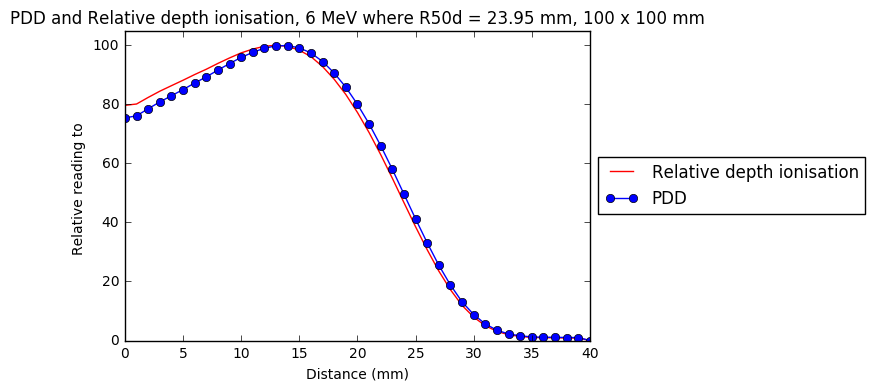

In [17]:
plt.plot(depth_ionisation, color='red',label='Relative depth ionisation', linestyle='-')
plt.plot(PDD_6MV_interp, label='PDD', marker='o', linestyle='-')
plt.xlim(0,40)
plt.ylim(0,105)
plt.title('PDD and Relative depth ionisation, 6 MeV where R50d = 23.95 mm, 100 x 100 mm')
plt.xlabel('Distance (mm)')
plt.ylabel('Relative reading to ')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## PDD from Depth ionisation 

Use historical measured Depth ionisation data to calculate PDD

In [18]:
ls

 Volume in drive C is WINDOWS
 Volume Serial Number is AE83-8D62

 Directory of C:\Users\RCole02.ROYALSURREY\Desktop\GitHub\Useful-python-for-medical-physics\Experiments in ipython notebooks\Omnipro\C-2 Electrons 16_1_2017

24/01/2017  14:11    <DIR>          .
24/01/2017  14:11    <DIR>          ..
24/01/2017  14:09    <DIR>          .ipynb_checkpoints
24/01/2017  14:06    <DIR>          archive
24/01/2017  14:11           307,094 C-2 electrons analysis R50d etc 24-1-2017.ipynb
24/01/2017  14:01               786 data_6e_10.csv
06/01/2017  12:44            10,726 RC_edit_electron_PDD_6_1_17.csv
06/01/2017  12:43            30,158 RC_edit_electron_Profile_6_1_17.csv
09/01/2017  16:37             2,690 Stopping-power-ratios-IAEA.csv
               5 File(s)        351,454 bytes
               4 Dir(s)  365,933,948,928 bytes free


In [80]:
DI_6e_10_df = pd.read_csv('data_6e_10.csv', index_col=0)
DI_6e_10_df = DI_6e_10_df[0:]   # keep 0 mm onwards only
DI_6e_10_df = 100.0*DI_6e_10_df/DI_6e_10_df.max()  # normalised to 100%
DI_6e_10_ds = DI_6e_10_df.iloc[:]   # convert to series
DI_6e_10_ds.head()

,Data
Coordinate_mm,
0.0,81.539980
1.0,81.243830
2.0,81.441264
3.0,83.415597
4.0,85.192498


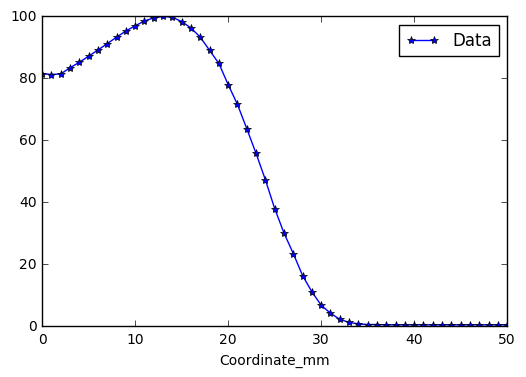

In [65]:
DI_6e_10_ds.plot(marker='*')

Use interp to get the R50D

In [73]:
f2 = interpolate.interp1d(DI_6e_10_ds.values.flatten(),DI_6e_10_ds.index.values)   # returns an interpolate function
print('The R50D is {} mm'.format(f2(50)))

The R50D is 23.680232558139537 mm


Calculate SPR

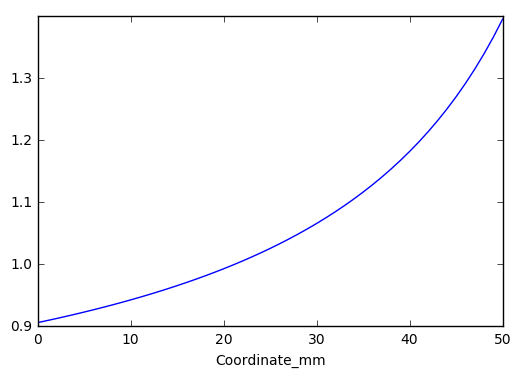

In [105]:
SPR_6e_10_ds = pd.Series(data=calc_SPR(f2(50), DI_6e_10_df.index.values), index=DI_6e_10_df.index.values)  # calc the SPR
SPR_6e_10_ds.index.name = 'Coordinate_mm'

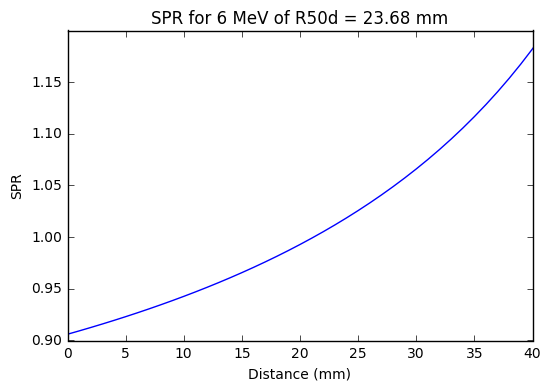

In [106]:
plt.plot(SPR_6e_10_ds)
plt.title('SPR for 6 MeV of R50d = 23.68 mm')
plt.xlim(0,40)
plt.ylim(0.9,1.2)
plt.xlabel('Distance (mm)')
plt.ylabel('SPR')

In [103]:
PDD_6e_10_ds = DI_6e_10_ds.multiply(SPR_6e_10_ds, axis=0) # element wise multiplication
PDD_6e_10_ds = 100.0*PDD_6e_10_ds/PDD_6e_10_ds.max()      # Normalise

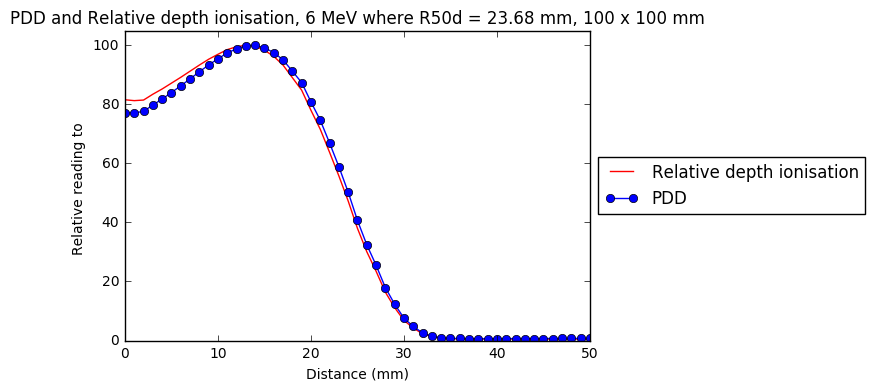

In [104]:
plt.plot(DI_6e_10_ds, color='red',label='Relative depth ionisation', linestyle='-')
plt.plot(PDD_6e_10_ds, label='PDD', marker='o', linestyle='-')
#plt.xlim(0,40)
plt.ylim(0,105)
plt.title('PDD and Relative depth ionisation, 6 MeV where R50d = 23.68 mm, 100 x 100 mm')
plt.xlabel('Distance (mm)')
plt.ylabel('Relative reading to ')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));